The vibrance of a photograph

Splitting the image into hue, saturation, and value planes

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Load the original grayscale image
original_image = cv.imread("E:/GitHub_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/spider.png")
assert original_image is not None
image_hsv = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)

# Split into hue, saturation, and value components
hue, saturation, value = cv.split(image_hsv)

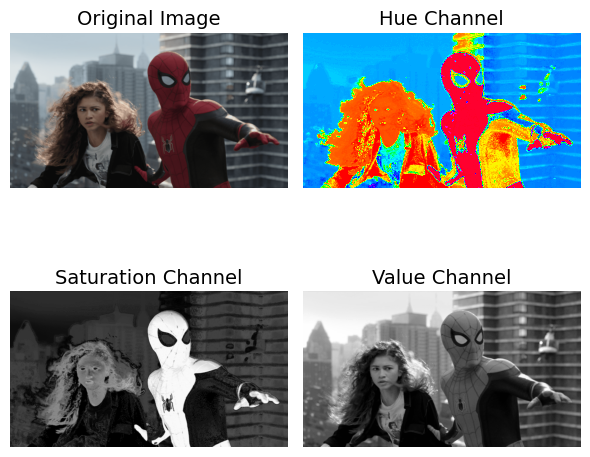

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image (make sure the path is correct)
original_image = cv.imread("E:/GitHub_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/spider.png")
assert original_image is not None, "Image not found."

# Convert the image from BGR to HSV color space
image_hsv = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)

# Split the HSV image into its three components
hue, saturation, value = cv.split(image_hsv)

# Create subplots to display the images
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# Plot the original image
axs[0, 0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image', fontsize=14)
axs[0, 0].axis('off')  # Hide axes for clarity

# Plot the Hue channel
axs[0, 1].imshow(hue, cmap='hsv')
axs[0, 1].set_title('Hue Channel', fontsize=14)
axs[0, 1].axis('off')

# Plot the Saturation channel
axs[1, 0].imshow(saturation, cmap='gray')
axs[1, 0].set_title('Saturation Channel', fontsize=14)
axs[1, 0].axis('off')

# Plot the Value channel
axs[1, 1].imshow(value, cmap='gray')
axs[1, 1].set_title('Value Channel', fontsize=14)
axs[1, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


##### Apply intensity transformation to the saturation plane.

In [10]:
# Define the intensity transformation function
def apply_intensity_transformation(pixel_values, scaling_factor=0.6, sigma=70):

    #Modify pixel intensity using a Gaussian-based transformation.

    adjustment = scaling_factor * (128 * np.exp(-((pixel_values - 128) ** 2) / (2 * sigma ** 2)))
    transformed_values = np.minimum(pixel_values + adjustment, 255)
    return transformed_values

# Execute the transformation on the saturation channel
transformed_saturation = apply_intensity_transformation(saturation, scaling_factor=0.6).astype(np.uint8)


##### Adjust alpha to get different outputs

In [ ]:
from ipywidgets import interact, FloatSlider

# Function to update the image based on alpha
def adjust_saturation_plane(alpha):
    # Apply the intensity transformation to the saturation plane
    saturation_transformed = apply_intensity_transformation(saturation, alpha=alpha).astype(np.uint8)

    # Display the transformed saturation plane
    plt.figure(figsize=(6, 4))
    plt.imshow(saturation_transformed, cmap='gray')
    plt.colorbar()
    plt.title(f'Transformed Saturation Plane (alpha={alpha:.2f})')
    plt.axis('off')
    plt.show()

# Create an interactive slider
interact(adjust_saturation_plane, alpha=FloatSlider(value=0.5, min=0, max=1, step=0.05, description='Alpha:'))


##### Adjust alpha to get a visually pleasing output

In [5]:
# Function to update the image based on alpha
def update_image(alpha):
    # Apply the intensity transformation to the saturation plane
    saturation_transformed = intensity_transform(saturation, alpha=alpha).astype(np.uint8)

    # Reconstruct the image
    image_hsv_transformed = cv2.merge([hue, saturation_transformed, value])
    image_transformed = cv2.cvtColor(image_hsv_transformed, cv2.COLOR_HSV2BGR)

    # Convert images for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_transformed_rgb = cv2.cvtColor(image_transformed, cv2.COLOR_BGR2RGB)

    # Display the original and transformed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(image_transformed_rgb)
    plt.title('Vibrance Enhanced Image')
    plt.axis('off')

    # Display the transformation on the saturation values
    plt.subplot(1, 3, 3)
    x_values = np.arange(0, 256)
    plt.plot(x_values, intensity_transform(x_values, alpha=alpha))
    plt.title('Intensity Transformation')
    plt.xlabel('Input Saturation Value')
    plt.ylabel('Output Saturation Value')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create an interactive slider
interact(update_image, alpha=FloatSlider(value=0.5, min=0, max=1, step=0.05, description='Alpha:'))

interactive(children=(FloatSlider(value=0.5, description='Alpha:', max=1.0, step=0.05), Output()), _dom_classe…

<function __main__.update_image(alpha)>